## In this problem of multiclass classification , we are going to build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and test sets for us.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#Showing the first training example
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

Checking the shapes of the test and train data

In [3]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
test_data.shape, test_labels.shape

((10000, 28, 28), (10000,))

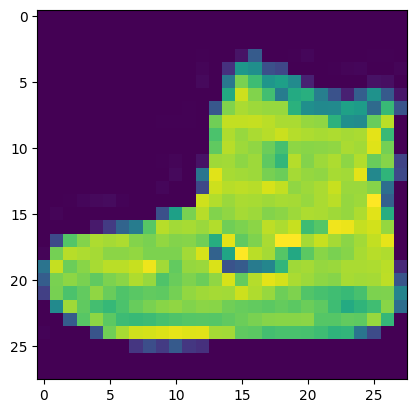

In [5]:
#Plotting a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);


In [6]:
#checking its label
train_labels[0]

9

In [7]:
#creating human readable labels of given training data

class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Shirt')

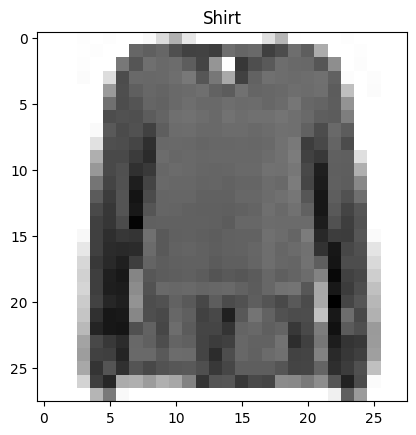

In [8]:
#Plotting an example image and its label
index = 18
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

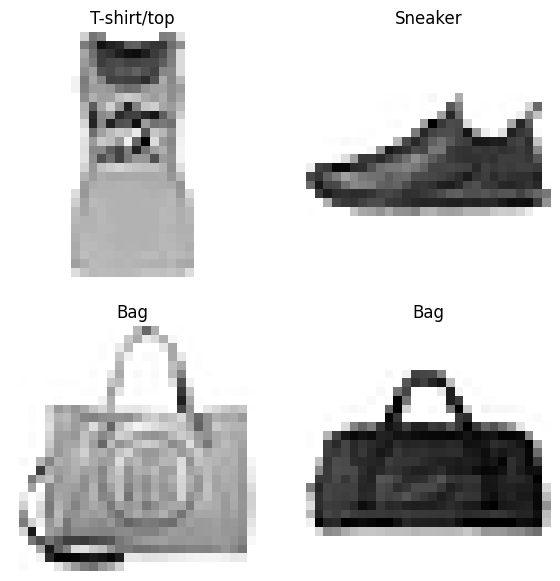

In [9]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)

### Now lets build the multiclassification model

In [10]:
#setting the random seed
tf.random.set_seed(42)

#create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


#compiling the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#Fitting the model
history = model_1.fit(train_data,
                      train_labels,
                      epochs=10,
                      validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 2.1452 - accuracy: 0.1860 - val_loss: 1.7850 - val_accuracy: 0.2721
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7162 - accuracy: 0.2665 - val_loss: 1.6408 - val_accuracy: 0.2767
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6369 - accuracy: 0.2772 - val_loss: 1.5692 - val_accuracy: 0.2900
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5362 - accuracy: 0.3207 - val_loss: 1.4878 - val_accuracy: 0.3532
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4750 - accuracy: 0.3490 - val_loss: 1.4376 - val_accuracy: 0.3660
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4402 - accuracy: 0.3675 - val_loss: 1.4502 - val_accuracy: 0.3790
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4186 - accuracy: 0.3839 - val_loss: 1.5016 - val_accuracy

In [11]:
#checkinng the model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Now lets try to improve the accuracy by standardising or normalizing the data ( between 0 and 1)

In [12]:
#checking the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

In [15]:
#normalizing the training and testing data
norm_train_data = train_data/255.0
norm_test_data = test_data/255.0

#checking our normalized data
norm_train_data.max(), norm_test_data.min()

(1.0, 0.0)

In [17]:
#Using this normalised data on the same model we built above

#setting random seed
tf.random.set_seed(42)

#building the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compiling the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#fitting the model
norm_history = model_2.fit(norm_train_data,
                           train_labels,
                           epochs=10,
                           validation_data = (norm_test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6080 - accuracy: 0.4029 - val_loss: 1.1924 - val_accuracy: 0.5562
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0581 - accuracy: 0.6031 - val_loss: 0.9879 - val_accuracy: 0.6321
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8989 - accuracy: 0.6571 - val_loss: 0.8808 - val_accuracy: 0.6559
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8250 - accuracy: 0.6763 - val_loss: 0.8377 - val_accuracy: 0.6770
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7917 - accuracy: 0.6867 - val_loss: 0.8135 - val_accuracy: 0.6862
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7653 - accuracy: 0.7173 - val_loss: 0.7885 - val_accuracy: 0.7185
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7322 - accuracy: 0.7395 - val_loss: 0.7580 - val_accuracy:

### Plotting the loss curves for normalized data and non-normalized data

<Axes: title={'center': 'Normalized'}>

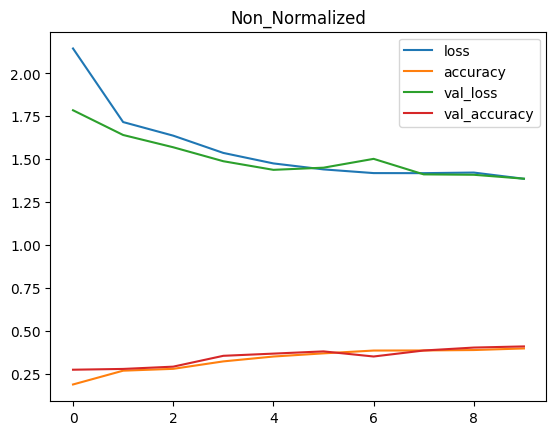

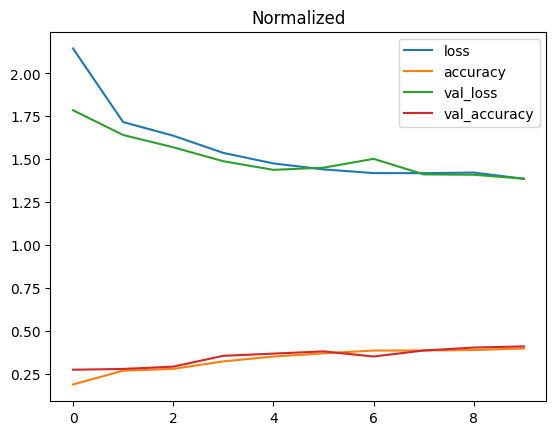

In [18]:
import pandas as pd

#Plotting the non-normalized data loss curve
pd.DataFrame(history.history).plot(title = "Non_Normalized")

#Plotting the normalized data loss curve
pd.DataFrame(history.history).plot(title = "Normalized")

### Finding the ideal learning rate using the callback

In [23]:
#Using this normalised data on the same model we built above but with callback method

#setting random seed
tf.random.set_seed(42)

#building the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compiling the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#creaating the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))

#fitting the model
lr_norm_history = model_3.fit(norm_train_data,
                           train_labels,
                           epochs=40,
                           validation_data = (norm_test_data, test_labels),
                           callbacks=[lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1402 - accuracy: 0.6046 - val_loss: 0.8009 - val_accuracy: 0.7093 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6980 - accuracy: 0.7571 - val_loss: 0.6604 - val_accuracy: 0.7719 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6203 - accuracy: 0.7804 - val_loss: 0.6374 - val_accuracy: 0.7715 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5974 - accuracy: 0.7826 - val_loss: 0.6188 - val_accuracy: 0.7776 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5837 - accuracy: 0.7857 - val_loss: 0.6192 - val_accuracy: 0.7752 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5724 - accuracy: 0.7888 - val_loss: 0.6097 - val_accuracy: 0.7766 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

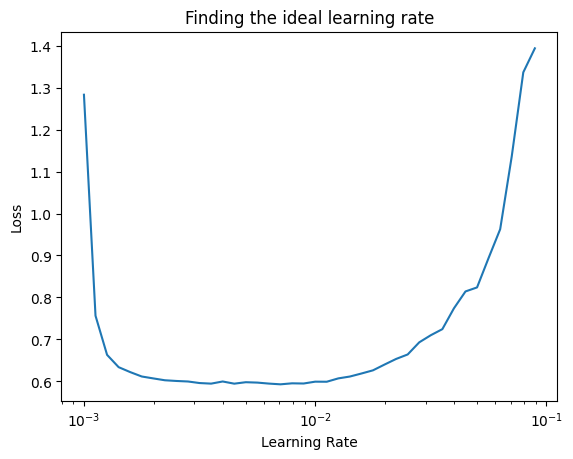

In [22]:
#plotting the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_norm_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

## Lets now rebuild our model with the ideal learning rate

In [28]:
#Using this normalised data on the same model we built above but with callback method and ideal learning rate

#setting random seed
tf.random.set_seed(42)

#building the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compiling the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])

#fitting the model
lr_norm_history = model_4.fit(norm_train_data,
                           train_labels,
                           epochs=40,
                           validation_data = (norm_test_data, test_labels))

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3171 - accuracy: 0.4884 - val_loss: 0.9585 - val_accuracy: 0.6236
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8798 - accuracy: 0.6441 - val_loss: 0.8718 - val_accuracy: 0.6460
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8215 - accuracy: 0.6564 - val_loss: 0.8271 - val_accuracy: 0.6668
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7902 - accuracy: 0.6858 - val_loss: 0.7929 - val_accuracy: 0.7171
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7597 - accuracy: 0.7195 - val_loss: 0.7652 - val_accuracy: 0.7244
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7404 - accuracy: 0.7331 - val_loss: 0.7708 - val_accuracy: 0.7296
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7263 - accuracy: 0.7423 - val_loss: 0.7695 - val_accuracy:

### Evaulating our multiclass classification model

In [29]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [30]:
class_names

['T-shirt/top',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [31]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [34]:
#Lets make predictions with our model
y_probs = model_4.predict(norm_test_data)

#Viewing the firsr 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.65595619e-14, 1.33894042e-11, 8.38167106e-16, 1.64987485e-25,
        8.12260745e-11, 3.35326016e-01, 4.41123180e-12, 1.15524903e-01,
        2.26949146e-06, 5.49146891e-01],
       [7.65582536e-06, 3.52378776e-17, 9.56999719e-01, 6.71652911e-09,
        1.16431816e-02, 1.29238295e-11, 3.13492306e-02, 5.53316900e-34,
        1.54084987e-07, 7.98325974e-24],
       [2.39907950e-03, 9.78370845e-01, 7.93917934e-06, 1.19544845e-02,
        2.48201486e-05, 2.62084045e-03, 9.18941732e-05, 4.43833135e-03,
        8.30943973e-05, 8.71042357e-06],
       [2.39907950e-03, 9.78370845e-01, 7.93917934e-06, 1.19544845e-02,
        2.48201486e-05, 2.62084045e-03, 9.18941732e-05, 4.43833135e-03,
        8.30943973e-05, 8.71042357e-06],
       [1.35179564e-01, 9.24505457e-06, 5.09983063e-01, 5.59618790e-03,
        1.30348951e-02, 1.49875405e-05, 3.35897774e-01, 5.20340694e-18,
        2.84260197e-04, 1.92658254e-13]], dtype=float32)

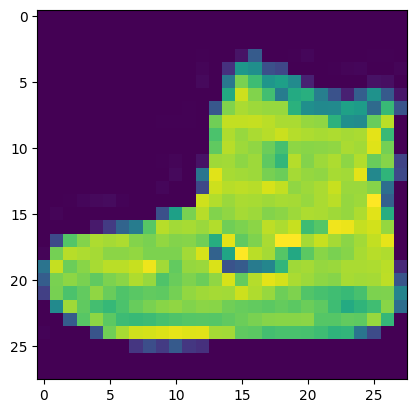

In [36]:
#plotting the ist data object
plt.imshow(train_data[0]);

In [35]:
#Making its prediction
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.6559562e-14, 1.3389404e-11, 8.3816711e-16, 1.6498748e-25,
        8.1226074e-11, 3.3532602e-01, 4.4112318e-12, 1.1552490e-01,
        2.2694915e-06, 5.4914689e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [48]:
#Now lets convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

#Viewing the first 1 predictions
y_preds[0], class_names[tf.argmax(y_probs[0])]

(9, 'Ankle boot')

In [38]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[829,   4,  19,  61,   1,   1,  72,   0,  13,   0],
       [  9, 927,   4,  52,   2,   1,   5,   0,   0,   0],
       [ 29,   1, 743,  18, 105,   0, 103,   0,   1,   0],
       [ 61,  15,  31, 785,  50,   1,  51,   0,   6,   0],
       [  1,   0, 190,  42, 636,   0, 125,   0,   6,   0],
       [  0,   0,   0,   1,   1, 943,   0,  28,   7,  20],
       [204,   1, 141,  43,  81,   1, 506,   0,  23,   0],
       [  0,   0,   0,   0,   0,  76,   0, 888,   1,  35],
       [  8,   1,   3,   4,   2,   9,  48,   4, 921,   0],
       [  0,   0,   0,   0,   0,  40,   1,  44,   0, 915]])

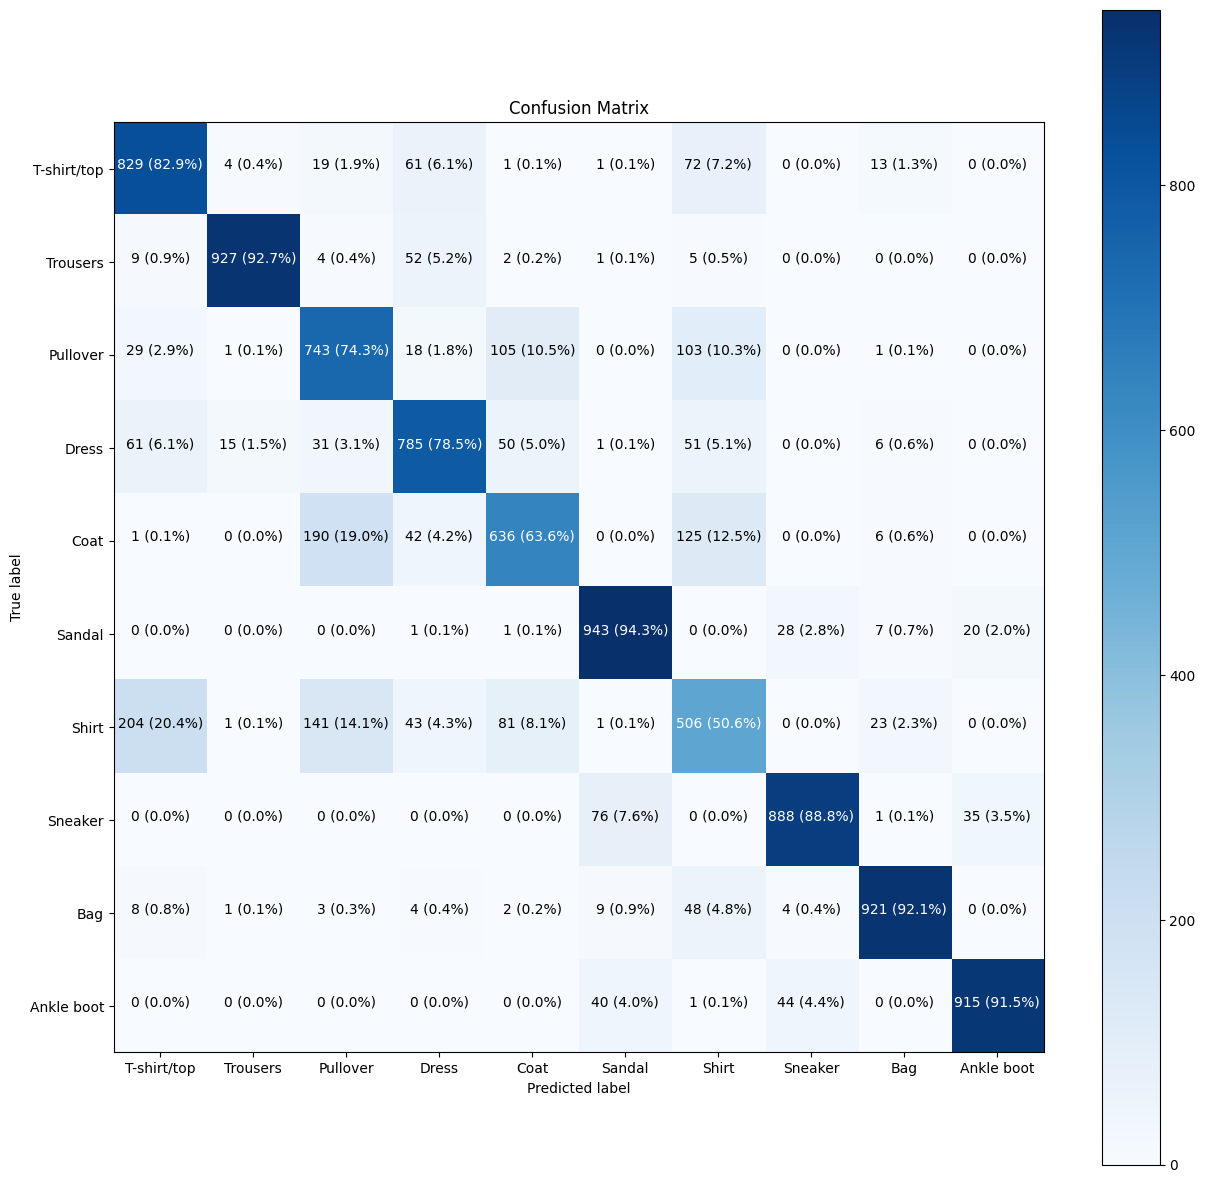

In [43]:
#Lets make a better confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size = 10)

## Let's create a function to plot a random image along with its prediction.

In [49]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                   color=color) # set the color to green or red



1/1 [==============================] - 0s 22ms/step


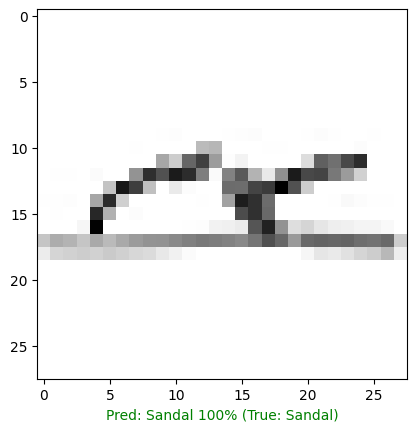

In [56]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

# Patterns our model is learning

In [57]:
# Find the layers of our most recent model
model_4.layers

In [63]:
# Extracting a particular layer
model_4.layers[1]


In [67]:
# Getting the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

In [68]:
# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.6286177 ,  0.04304771,  0.27682275, -1.1177504 ],
        [-0.50602835,  1.4612656 , -1.3399148 , -0.69901824],
        [-1.6388192 ,  1.4361247 ,  1.1517581 ,  0.20172885],
        ...,
        [-0.19037662, -0.10284518,  0.09389258, -0.10114335],
        [ 0.52314425,  0.522483  ,  0.27723047, -0.4458822 ],
        [-0.16856955, -0.40255272,  0.59475726,  0.01509975]],
       dtype=float32),
 (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data
influences the network's decisions.

#Now let's check out the bias vector.

In [66]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([1.6029571, 2.7418947, 4.0676045, 1.9065827], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [70]:
#Now lets calculate the number of paramters in our model
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 4)                 3140      
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Starting from the input layer, each subsequent layer's input is the output of the previous layer as shown below

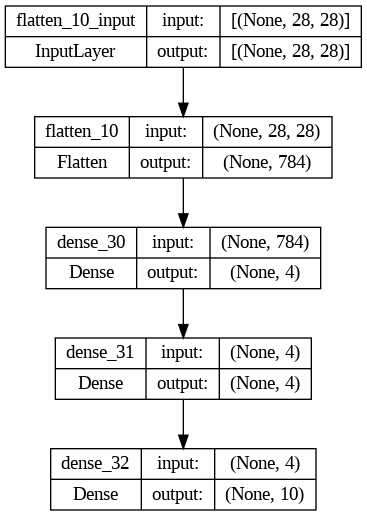

In [71]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)

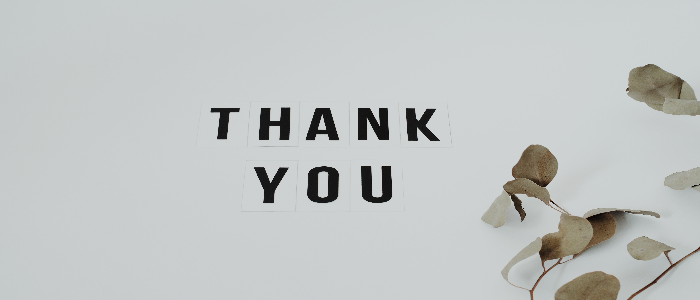

In [84]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/pexels-vie-studio-4439457.jpg', cv2.IMREAD_UNCHANGED)
resized_image = cv2.resize(img,(700,300))
cv2_imshow(resized_image)